In [27]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

In [28]:
x,N,p = sp.symbols('x N p', positive=True, real=True)

In [29]:
def prod_ks(N):
    return N**.4

# løs x=f(N)
N_ks = sp.solve(prod_ks(N)-x,N)[0]
N_ks

x**(5/2)

In [30]:
Kostnad=5+3*N_ks
Kostnad

3*x**(5/2) + 5

In [31]:
# tilbudet gis av likning (3) p=GK
GK = sp.diff(Kostnad, x)
GK

15*x**(3/2)/2

In [32]:
AOB=sp.diff(GK,x)
AOB

45*sqrt(x)/4

In [33]:
# vi gjør klart for å plotte
Kostnad_fn=sp.lambdify(x, Kostnad)

GK_fn=sp.lambdify(x, GK)

display(Kostnad_fn(x))
display(GK_fn(x))

3*x**2.5 + 5

7.5*x**1.5

In [34]:
def AC(x):
    return Kostnad_fn(x)/x
# finn lavest x som gir positiv fortjeneste, dvs reservasjonsprisen

lavest_x=sp.solve(AC(x)-GK_fn(x),x)[0]
lavest_x

1.04304488151063

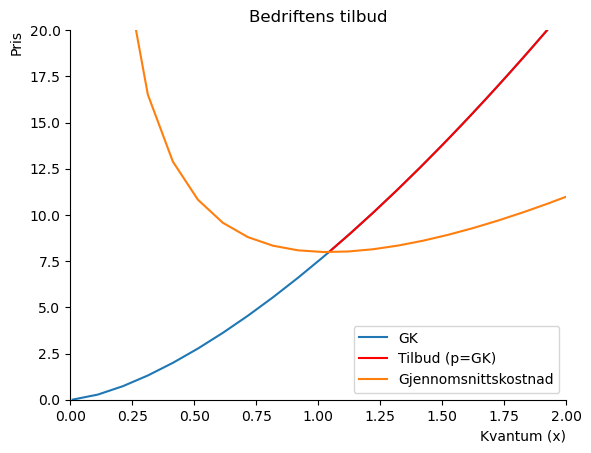

In [35]:
x_num=np.linspace(0.01,10,100)
x_1=np.linspace(float(lavest_x),10,100)
fig, ax = plt.subplots()
ax.set_ylabel('Pris', loc='top')
ax.set_xlabel('Kvantum (x)', loc='right')
ax.set(xlim=(0,2))
ax.set(ylim=(0,20))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(x_num, GK_fn(x_num), label = 'GK')
ax.plot(x_1, GK_fn(x_1), color='red', label = 'Tilbud (p=GK)')
ax.plot(x_num, AC(x_num), label = 'Gjennomsnittskostnad')


ax.set_title('Bedriftens tilbud')
ax.legend(loc='best');

In [36]:
N, K, w, r, x = sp.symbols("N K w r x", positive =True, real =True)

def prod1(N, K):
    return N**(2/5) * K**(1/4)

prod1(N, K)

K**0.25*N**0.4

In [37]:
solveN = sp.solve(prod1(N, K)-x, N) [0]
kostnad1 = K*r+w*solveN
GK1 = sp.diff(kostnad1, x)
AOB1 = sp.diff(solveN, x)
kostlamb1 = sp.lambdify((x, w, r, K), kostnad1)
GKlamb1 = sp.lambdify((x, w, r, K), GK1)

In [38]:
def AC1(x, w, K, r):
    return kostlamb1(x, w, K, r) / x

lavx = sp.solve(AC1(x, w, r, K) - GKlamb1(x, w, r, K), x) [2]
lavxlamb = sp.lambdify((w, r, K), lavx)

display(lavx)

0.850283000417194*K**(13/20)*r**(2/5)/w**(2/5)

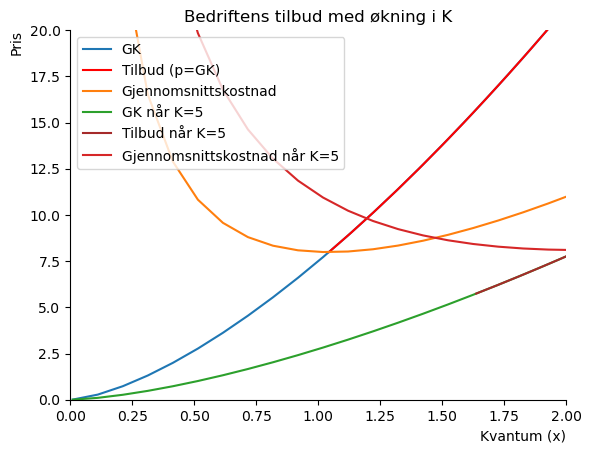

In [39]:
x_num = np.linspace(0.01,10,100)
x_1=np.linspace(float(lavest_x),10,100)
x_k = np.linspace(float(lavxlamb(3,5,2)),10,100)
x_r = np.linspace(float(lavxlamb(3,6,1)),10,100)
x_w = np.linspace(float(lavxlamb(4,5,1)),10,100)

fig, ax = plt.subplots()
ax.set_ylabel('Pris', loc='top')
ax.set_xlabel('Kvantum (x)', loc='right')
ax.set(xlim=(0,2))
ax.set(ylim=(0,20))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(x_num, GK_fn(x_num), label = 'GK')
ax.plot(x_1, GK_fn(x_1), color='red', label = 'Tilbud (p=GK)')
ax.plot(x_num, AC(x_num), label = 'Gjennomsnittskostnad')

ax.plot(x_num, GKlamb1(x_num,3,2,5), label = 'GK når K=5')
ax.plot(x_k, GKlamb1(x_k,3,2,5), color='brown', label = 'Tilbud når K=5')
ax.plot(x_num, AC1(x_num,3,2,5), label = 'Gjennomsnittskostnad når K=5')


ax.set_title('Bedriftens tilbud med økning i K')
ax.legend(loc='best')

Vi ser at økt kapital bidrar til at grensekostnadene blir lavere og vil bidra til en økning i produksjon.

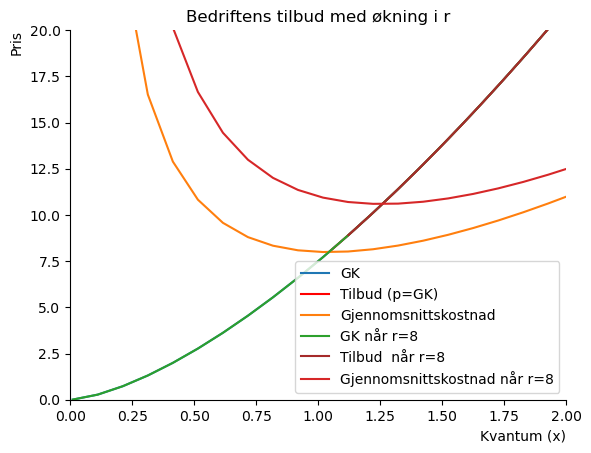

In [40]:
fig, ax = plt.subplots()
ax.set_ylabel('Pris', loc='top')
ax.set_xlabel('Kvantum (x)', loc='right')
ax.set(xlim=(0,2))
ax.set(ylim=(0,20))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')




ax.plot(x_num, GK_fn(x_num), label = 'GK')
ax.plot(x_1, GK_fn(x_1), color='red', label = 'Tilbud (p=GK)')
ax.plot(x_num, AC(x_num), label = 'Gjennomsnittskostnad')

ax.plot(x_num, GKlamb1(x_num,3,8,1), label = 'GK når r=8')
ax.plot(x_r, GKlamb1(x_r,3,8,1), color='brown', label = 'Tilbud  når r=8')
ax.plot(x_num, AC1(x_num,3,8,1), label = 'Gjennomsnittskostnad når r=8')


ax.set_title('Bedriftens tilbud med økning i r')
ax.legend(loc='best')

Høyerer renter vil føre til en økning i gjennomsnittskostandene fordi den vil øke prisen på kapital.

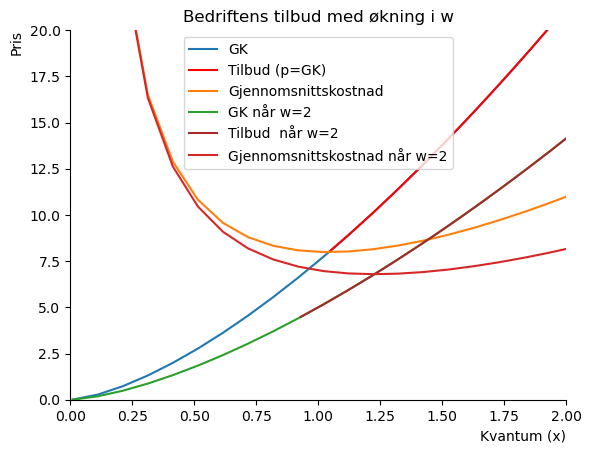

In [41]:
fig, ax = plt.subplots()
ax.set_ylabel('Pris', loc='top')
ax.set_xlabel('Kvantum (x)', loc='right')
ax.set(xlim=(0,2))
ax.set(ylim=(0,20))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')


ax.plot(x_num, GK_fn(x_num), label = 'GK')
ax.plot(x_1, GK_fn(x_1), color='red', label = 'Tilbud (p=GK)')
ax.plot(x_num, AC(x_num), label = 'Gjennomsnittskostnad')


ax.plot(x_num, GKlamb1(x_num,2,5,1), label = 'GK når w=2')
ax.plot(x_w, GKlamb1(x_w,2,5,1), color='brown', label = 'Tilbud  når w=2')
ax.plot(x_num, AC1(x_num,2,5,1), label = 'Gjennomsnittskostnad når w=2')


ax.set_title('Bedriftens tilbud med økning i w')
ax.legend(loc='best')

En økning i lønningene gjør arbeidskraften dyrere, dette presser opp grensekostnadene deres og gjør at tilbudet deres blir dyrere.